In [39]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
import math

600
0.74875


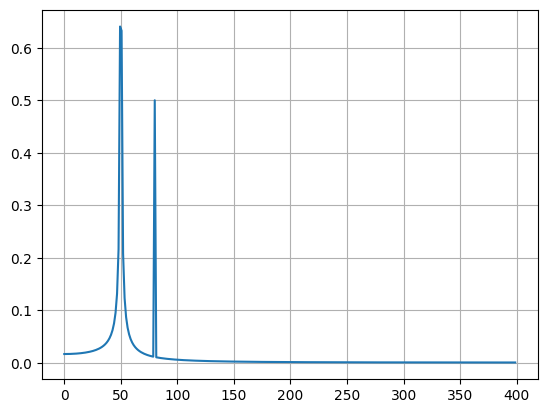

In [40]:


# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
print(len(x))
print(x[-1])
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
fourier =  2.0/N * np.abs(yf[0:N//2])

# plt.plot(x, y)
plt.plot(xf, fourier)
plt.grid()
plt.show()

In [41]:
def visualize(x, y):
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(x, y)
    plt.show()


def visualize_points(x, y, xpoints, ypoints):
    plt.figure(1)
    plt.title("Sound wave and peaks")
    plt.xlabel("Time")
    plt.plot(x, y)
    plt.scatter(xpoints, ypoints, c="red")
    plt.show()


In [42]:


# Returns the x and y coords to plot sound wave, and the frequency.
# Note: Sound wave must be formatted as a 16-bit mono .wav file
def get_soundwave(wav: wave.Wave_read, start_time: int = 0, end_time=None):
     
    signal = wav.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")

    f_rate = wav.getframerate()
    
    T = len(signal)/f_rate

    if end_time is None:
        end_time = T
    y = signal[int(start_time*f_rate):int(end_time*f_rate)]

    x = np.linspace(
        0, # start
        len(y) / f_rate,
        num = len(y)
    )

    return x, y, f_rate


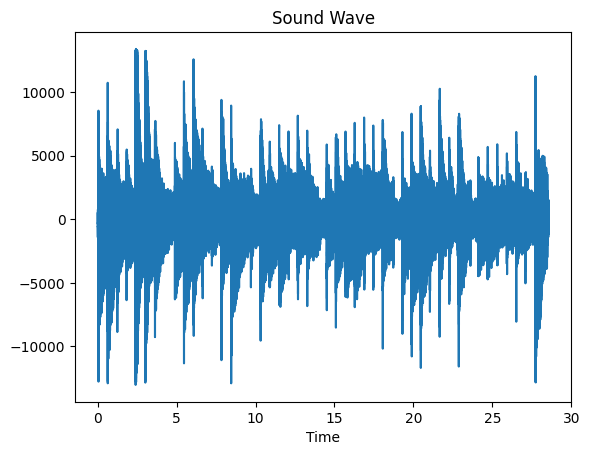

69330


In [43]:
twinkle = wave.open("twinkle.wav")

x, y, f_rate = get_soundwave(twinkle)
# x, y, T, f_rate = get_soundwave("untitled.wav", start_time=0.1, end_time=0.5)
# x, y, f_rate = get_soundwave("untitled.wav", start_time=3, end_time=3.4)
# x, y, f_rate = get_soundwave("babe.wav")
visualize(x, y)
print(len(find_peaks(y, prominence=1)[0]))

In [44]:

# Returns the main frequency of the soundwave
def get_note(x, y, f_rate):
    N = len(y)
    T=1/f_rate
    # Number of sample points
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    fourier =  2.0/N * np.abs(yf[0:N//2])
    return xf[np.argmax(fourier)]



47
[261.20939955866976, 262.04624027657735, 396.87388987566607, 792.9578007084551, 1326.071415410694, 884.938911514254, 1188.988143576417, 396.02387333867534, 705.9783904027965, 704.6516837153737, 332.28327521943004, 331.9318786588611, 293.88992886559345, 293.91339568451286, 261.6557613396917, 261.35649883497115, 396.39012721539626, 793.8502891585892, 352.8403246085267, 352.96212614406613, 332.12961532519694, 332.2568432211411, 294.4329896907216, 293.14767635948346, 397.342043022863, 396.220277282937, 353.0755711775044, 705.7070266580714, 332.3298582640271, 331.91754916792735, 294.5582152302163, 119.72379603399432, 262.0792117918442, 261.3258401192797, 396.4861999921479, 396.7866323907455, 885.2007257881605, 440.3754675187915, 396.88183287384726, 119.40433212996389, 705.5329659889796, 351.98036497170904, 331.924882629108, 332.77945043637334, 294.961355529132, 398.1124333196553, 261.49748743718595]


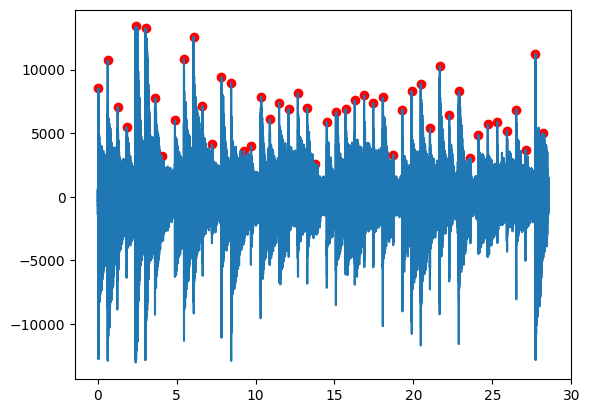

In [45]:
smallest_distance = 1/4

def bpm_to_dist(bpm: float, f_rate: float):
    return f_rate/(60 / bpm) * smallest_distance

# Returns the indecies in the array in 
def get_note_positions(y, bpm, f_rate):

    return find_peaks(y, distance=bpm_to_dist(bpm, f_rate))[0]


def get_notes(x, y, bpm, f_rate):

    note_positions = get_note_positions(y, bpm, f_rate)

    notes = []

    for i in range(1, len(note_positions)):
        notes.append(get_note(x[note_positions[i-1]:note_positions[i]], y[note_positions[i-1]:note_positions[i]], f_rate))
    return notes

print(len(get_notes(x, y, 100, f_rate)))
npos = get_note_positions(y, 100, f_rate)
plt.plot(x, y)
plt.scatter(x[npos], y[npos], c="red")
print(get_notes(x, y, 100, f_rate))

In [46]:
# Keys and Modes Lookup
# if has 4th -> major
# if has 3rd -> minor

scales = {
    'Major/Ionian': [2, 4, 5, 7, 9, 11],
    'Lydian': [2, 4, 6, 7, 9 ,11],
    'Mixolydian': [2, 4, 5, 7, 9, 10],
    'Dorian': [2, 3, 5, 7, 9, 10],
    'Phrygian': [1, 3, 5, 7, 8, 10],
    'Aeolian/Natural Minor': [2, 3, 5, 7, 8, 10],
    'Locrian': [1, 3, 5, 6, 8, 10]
}

In [54]:
# Note Mapping

C0 = 16.35 # lowest C
musical_notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] # order of semitones starting at C

# approach: use equal-temperament
def get_musical_note(freq: float):
  dist = round(12 * math.log2(freq / C0)) # number of semitones of frequency from a C0
  group = int(dist / 12) # exact pitch number (ie "5" in "C5")
  note = musical_notes[dist % 12] # the index of the note based on the pitch
  return note, group, dist

def get_musical_notes(notes):
  unique_notes = set()
  song_notes = []
  for freq in notes:
    if freq != 0:
      note, group, dist = get_musical_note(freq)
      song_notes.append((freq, str.format('{}{}', note, group), smallest_distance))
      unique_notes.add(dist % 12)
    else:
      song_notes.append((freq, f'Rest'))
  unique_notes = sorted(unique_notes)
  scale_notes = [musical_notes[semitone] for semitone in unique_notes]
  # musical_notes: notes played in sequential order
  # unique_notes: all unique notes, used for computing the key
  # scale_notes: all of the notes corresponding to the unique indecies
  return song_notes, sorted(unique_notes), scale_notes

def compute_keys(unique_notes): # Work in progress
  # limitation: only considers root notes as those in the set of unique notes. not always the case. 
  possible_keys = []
  for idx, root in enumerate(unique_notes):
    # compute all relative semitones to each possible root
    semitones = [(semitone - root) % 12 for semitone in unique_notes[0:idx] + unique_notes[idx+1:]]
    for scale in scales:
      if set(semitones).issubset(set(scales[scale])):
        possible_keys.append(f'{musical_notes[root]} {scale}')
  return possible_keys

notes = get_notes(x, y, 100, f_rate) # grab notes
musical, unique, scale_notes = get_musical_notes(notes) # get sequential notes and unique
keys = compute_keys(unique)
  

In [57]:
# Export song data to JSON
import json

# Open sound file
twinkle = wave.open("twinkle.wav")
bpm = 100

# Pre-process
# Maybe we can do something here with trimming empty space from ends of sound file, otherwise no preprocessing

# Process
x, y, f_rate = get_soundwave(twinkle)

# Post-process
notes = get_notes(x, y, bpm, f_rate) # grab notes
musical, unique, scale_notes = get_musical_notes(notes) # get sequential notes and unique
keys = compute_keys(unique)

# export data

exported = {
    'possibleKeys': keys,
    'recordedScaleNotes': scale_notes,
    'songDataPoints': [
        { 
            'recordedFrequency': f'{freq} Hz', 
            'notation': note,
            'duration': f'{duration.as_integer_ratio()[0]}/{duration.as_integer_ratio()[1]}' 
        } for freq, note, duration in musical
    ]
}

exported = json.dumps(exported, indent=2)
with open('twinkleData.json', 'w') as outfile:
    outfile.write(exported)